### Modeling Arrival Rate by Time of Day

- Why?
- We observe in the data visualization that passenger arrival rates are not constant throughout the day, so it would be more appropriate to model the arrival rate according to the hour of the day.


In [1]:
from utils import *

import seaborn as sns
import matplotlib.pyplot as plt


import numpy as np
import pandas as pd
import scipy.special as sp
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')

plt.rcParams['figure.figsize'] = [10, 7]


In [2]:
# data
data = collect_data()

In [4]:
data.head()

,FlightDate,HourRange,TotalPassengerCount,AverageWait,BoothsUsed
0,2022-01-01,0500 - 0600,86,36,10
1,2022-01-01,0600 - 0700,489,14,17
2,2022-01-01,0700 - 0800,803,19,16
3,2022-01-01,0800 - 0900,309,27,12
4,2022-01-01,1100 - 1200,189,17,10


In [7]:

def map_time_to_period(hour_range):
    """
    Maps a given time range to 'morning' or 'afternoon'.
    
    Parameters:
        hour_range (str): A time range in the format "HHMM - HHMM".
    
    Returns:
        str: "morning" or "afternoon" based on the range.
    """
    # Extract the start hour from the range
    start_hour = int(hour_range.split(" - ")[0][:2])  # Extract the HH from HHMM

    # Map time to period
    if 6 <= start_hour < 12:
        return "morning"
    elif 12 <= start_hour < 18:
        return "afternoon"
    elif 18 <= start_hour < 24:
        return "evening"
    else:
        return "night"

data["time_of_day"] = list(map(lambda x: map_time_to_period(x), data["HourRange"]))


In [ ]:
# num_days = len(mdw_data["FlightDate"].drop_duplicates().reset_index(drop=True))

# First, let's visualize how the arrival rate depends on the time of day.
- We will treat the historical data as "realizations" of the unknown poisson RV's for each hour of the day

In [8]:
hours = data["time_of_day"].drop_duplicates().tolist()
hour_dict = {}
for h in hours:
    hour_dict[h] = data[data["time_of_day"] == h].reset_index(drop=True)["TotalPassengerCount"].tolist()
    # hour_dict[h] = pad_to_numdays(hour_dict[h])

In [ ]:
# pad_to_numdays = lambda x: x + [0] * (num_days - len(x)) if len(x) < num_days else x


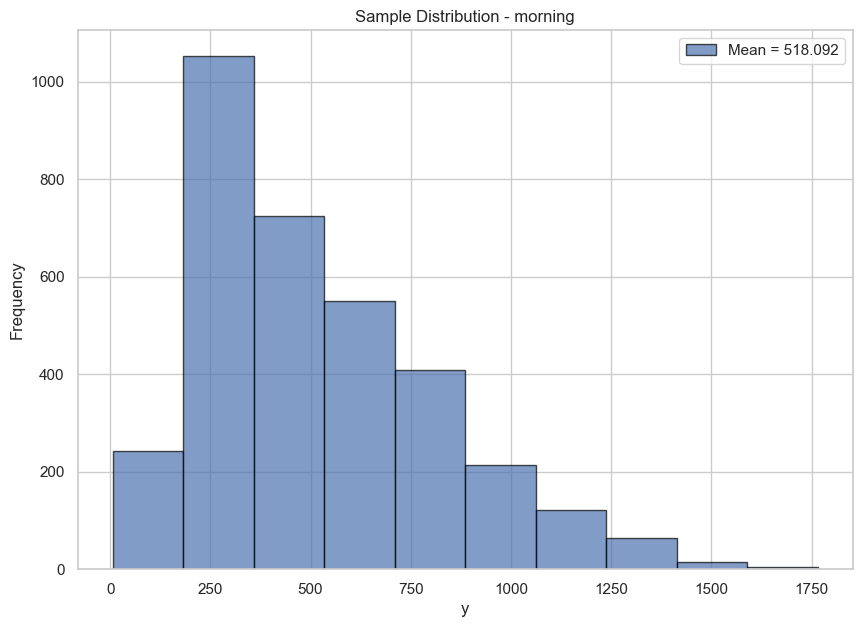

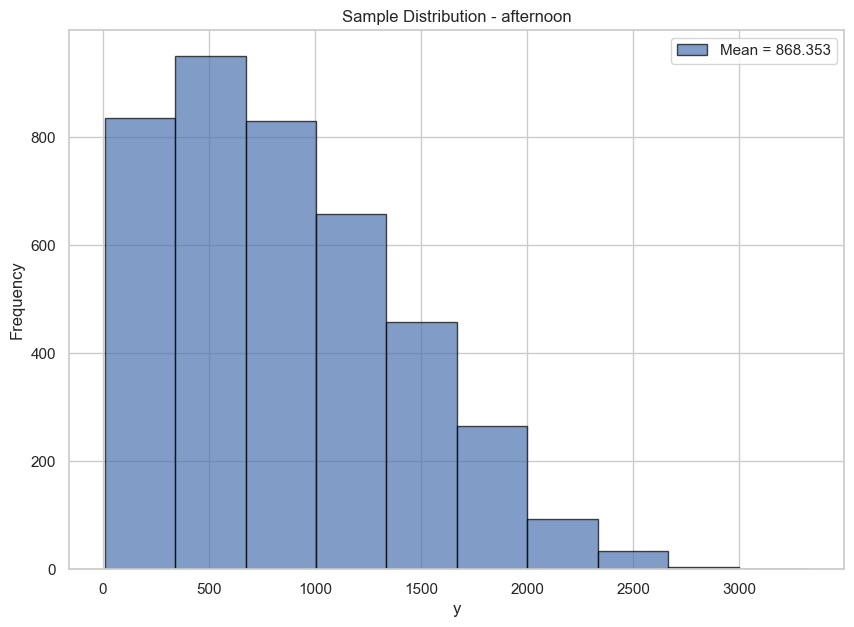

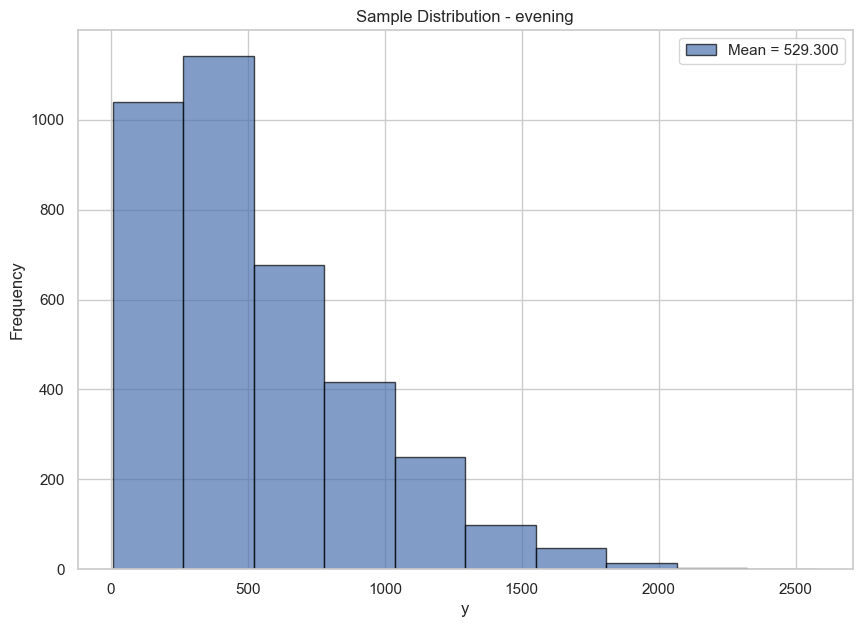

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")  # Set a Seaborn style for cleaner visuals

for h in hours:
    if h == "night":
        continue
        
    # Extract the data for the current hour
    y = np.array(hour_dict[h])

    # Create a histogram with wider bins
    fig, ax = plt.subplots()
    ax.hist(
        y, bins=10, color=sns.color_palette()[0], alpha=0.7, 
        edgecolor='black', label=f'Mean = {y.mean():.3f}'
    )
    
    # Add legend and title
    ax.legend(loc='upper right')
    ax.set(
        title=f'Sample Distribution - {h}',
        xlabel='y',
        ylabel='Frequency'
    )
    
    plt.show()  # Display the histogram
